# Dataset information

This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. The goal is to predict whether the patient will be more likely to undergo mental treatment, or no.

This dataset contains the following data:

**Timestamp**

**Age**

**Gender**

**Country**

**state**: If you live in the United States, which state or territory do you live in?

**self_employed**: Are you self-employed?

**family_history**: Do you have a family history of mental illness?

**treatment**: Have you sought treatment for a mental health condition?

**work_interfere**: If you have a mental health condition, do you feel that it interferes with your work?

**no_employees**: How many employees does your company or organization have?

**remote_work**: Do you work remotely (outside of an office) at least 50% of the time?

**tech_company**: Is your employer primarily a tech company/organization?

**benefits**: Does your employer provide mental health benefits?

**care_options**: Do you know the options for mental health care your employer provides?

**wellness_program**: Has your employer ever discussed mental health as part of an employee wellness program?

**seek_help**: Does your employer provide resources to learn more about mental health issues and how to seek help?

**anonymity**: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

**leave**: How easy is it for you to take medical leave for a mental health condition?

**mentalhealthconsequence**: Do you think that discussing a mental health issue with your employer would have negative consequences?

**physhealthconsequence**: Do you think that discussing a physical health issue with your employer would have negative consequences?

**coworkers**: Would you be willing to discuss a mental health issue with your coworkers?

**supervisor**: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

**mentalhealthinterview**: Would you bring up a mental health issue with a potential employer in an interview?

**physhealthinterview**: Would you bring up a physical health issue with a potential employer in an interview?

**mentalvsphysical**: Do you feel that your employer takes mental health as seriously as physical health?

**obs_consequence**: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

**comments**: Any additional notes or comments

Note about plotting the correlations between specified models parameters and scores. Parameters chosen may be different than "the best" values shown on the plot, because models work may slightly vary, due to impact of other parameters.

# Importing modules

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from keras.utils import normalize
import seaborn as sns

In [90]:
data = pd.read_csv('survey.csv')
data.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


# Data cleaning and preprocessing

In [91]:
data = data.drop(['Timestamp', 'state', 'comments'], axis=1)    # removing irrelevant features

In [92]:
data.isna().sum()  # sum of empty values in every column. As we can see NaNs exist in columns self_employed and work_interfere.

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [93]:
# replacing NaN values with categorical string value
data[['work_interfere', 'self_employed']] = data[['work_interfere', 'self_employed']].fillna('No data')

In [94]:
X = data.drop('treatment', axis = 1)
y = data[['treatment']]

In [95]:
# encoding categorical data
X = pd.get_dummies(X)

encoder = OneHotEncoder().fit(y)
encoded = encoder.transform(y).toarray()         
y = [e[1] for e in encoded]

In [96]:
age = np.squeeze(np.array(data[['Age']])).astype(float)        # removing dimension from 
age = normalize(age)
X['Age'] = age.reshape((-1,1))

# Splitting data into training and test sets

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [98]:
def plot_parameters_scores(model, attr, params):
    """    
    Sets attributes of given model and plots the test scores achieved with selected parameter.
    :param model: Machine Learning classifier 
    :param attr: classifier attribute 
    :param params: list, parameters of given attribute
    """
    scores = []
    for p in params:
        setattr(model, attr, p)
        
        model= model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        model_score = accuracy_score(y_test, predictions)
        scores.append(model_score)
        
    plt.plot(params, scores)
    plt.title(f'Test score with {attr.capitalize()} parameter.')
    plt.xlabel(f'{attr.capitalize()}')
    plt.ylabel('Model score')
    
    
    
def hyperparameters(model, params):
    """
    Using GridSearchCV class 
    :param model: Machine Learning classifier
    :param params: dictionary, parameters on which GridSearch will try to get the best configuration.
    
    :return best_params: dictionary, best model parameters 
    """
    grid_search = GridSearchCV(model, params, scoring='accuracy', cv=5).fit(X_train, y_train)
    best_params, best_score = grid_search.best_params_, grid_search.best_score_
    print(f'Best score: {best_score}')
    
    return best_params

def plot_confusion_matrix(cm, model_name):
    """
    Plot confusion matrix using seaborn heatmap.
    :param cm: confusion matrix to be shown on the plot.
    :param model_name: name of the classifier. Used in the title of the plot.
    """   
    sns.heatmap(cm, annot = True, fmt='g')
    plt.title(f'Confusion matrix of {model_name} on test score')
    plt.xlabel('Actual class')
    plt.ylabel('Predicted class')

# Decision Tree Classifier

Decision Tree Classifier is a powerful classification problems solving algorithm, that uses the decision tree as a predictive model (matches features to individual classes). It is a Supervised Machine Learning where the data is continuously split according to a certain parameter.

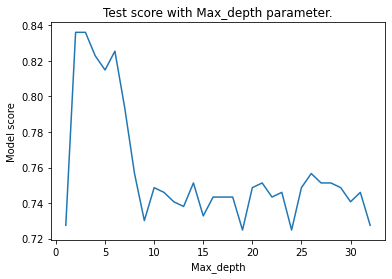

In [99]:
dtc = DecisionTreeClassifier()
decision_tree_params = {
    'max_depth': np.linspace(1,32,32),
    'min_samples_split': np.linspace(0.1,1.0,10),
    'min_samples_leaf': np.linspace(0.1, 0.5, 5)
}
plot_parameters_scores(dtc, 'max_depth', list(decision_tree_params.values())[0])

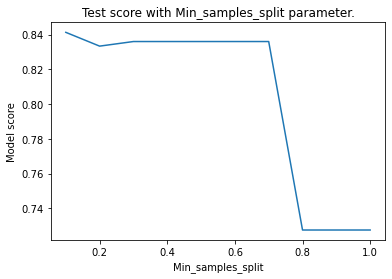

In [100]:
plot_parameters_scores(dtc, 'min_samples_split', list(decision_tree_params.values())[1])

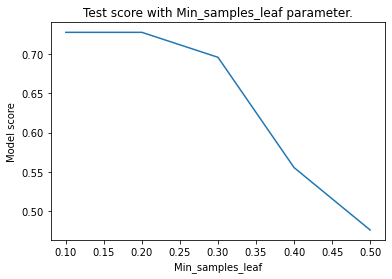

In [101]:
plot_parameters_scores(dtc, 'min_samples_leaf', list(decision_tree_params.values())[2])

In [102]:
best_dtc_params = hyperparameters(dtc, decision_tree_params)
best_dtc_params

Best score: 0.8286016949152544


{'max_depth': 2.0, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}

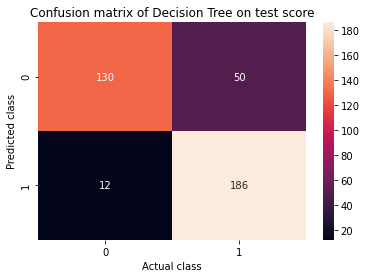

In [103]:
dtc_tuned = DecisionTreeClassifier(max_depth=2, min_samples_leaf = 0.1, min_samples_split = 0.1).fit(X_train, y_train)
predictions = dtc_tuned.predict(X_test)

dtc_cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(dtc_cm, 'Decision Tree')

In [111]:
score = accuracy_score(y_test, predictions)*100
print('Decision Tree Classifier score: {:.2f}%'.format(score))

Decision Tree Classifier score: 83.60%


# Random Forest Classifier

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

In [112]:
random_forest = RandomForestClassifier()
random_forest_params = {
    'n_estimators': np.arange(10, 330, 10),
    'max_depth': np.arange(1,21),
    'min_samples_split': [2, 5, 10]
}

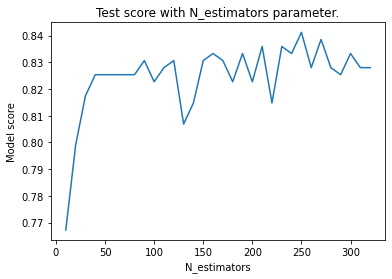

In [113]:
plot_parameters_scores(random_forest, 'n_estimators', list(random_forest_params.values())[0])

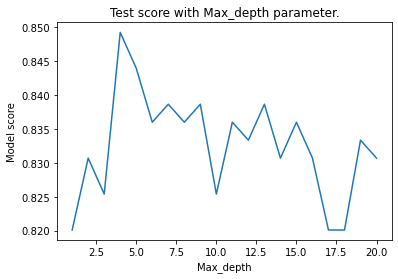

In [114]:
plot_parameters_scores(random_forest, 'max_depth', list(random_forest_params.values())[1])

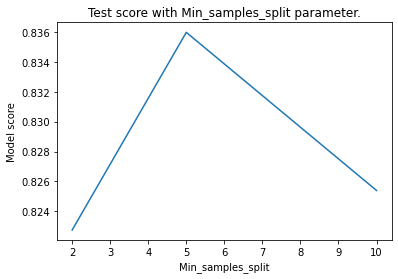

In [115]:
plot_parameters_scores(random_forest, 'min_samples_split', list(random_forest_params.values())[2])

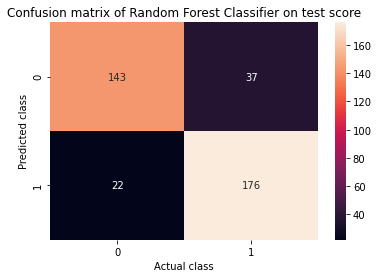

In [118]:
'''
Best parameters for Random Forest. Due to too long time of processing model will be tuned manually based on charts above.
best_forest_params = hyperparameters(random_forest, random_forest_params)
best_forest_params
'''

forest_tuned = RandomForestClassifier(n_estimators = 300, max_depth = 7, min_samples_split = 10).fit(X_train, y_train)
forest_predictions = forest_tuned.predict(X_test)

rfc_cm = confusion_matrix(y_test, forest_predictions)
plot_confusion_matrix(rfc_cm, 'Random Forest Classifier')

In [119]:
score = accuracy_score(y_test, forest_predictions)*100
print('Random Forest Classifier score: {:.2f}%'.format(score))

Random Forest Classifier score: 84.39%


# KNN

K-Nearest Neighbors Classifier is a classification algorithm that searches the entire data set for the k number of most similar cases, or neighbors, that show the same patterns.

In [125]:
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': np.arange(2,35),
    'leaf_size': np.arange(10,36)
    
}

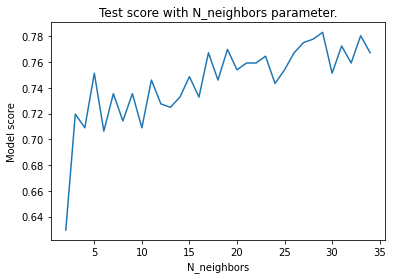

In [126]:
plot_parameters_scores(knn, 'n_neighbors', list(knn_params.values())[0])

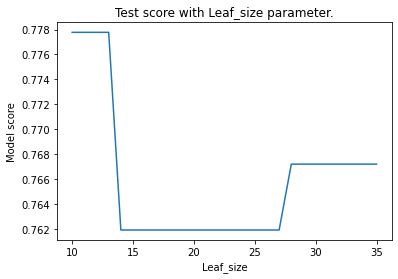

In [127]:
plot_parameters_scores(knn, 'leaf_size', list(knn_params.values())[1])

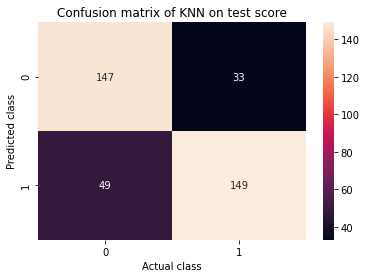

In [151]:
knn_tuned = KNeighborsClassifier(n_neighbors = 27, p = 2, leaf_size = 25).fit(X_train, y_train)
knn_predictions = knn_tuned.predict(X_test)

knn_cm = confusion_matrix(y_test, knn_predictions)
plot_confusion_matrix(knn_cm, 'KNN')

In [152]:
score = accuracy_score(y_test, knn_predictions)*100
print('KNN score: {:.2f}%'.format(score))

KNN score: 78.31%


# Logistic Regression

Logistic Regression is a linear classification algorithm, which computes the probability that value belongs to one of the group, based on the built regression model.

In [57]:
def roc_curve_plot():
    """
    Plots Receiver Operating Characteristic.
    """
    score = log_reg.predict_proba(X_test)[:,1]
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, score)
    print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, score))
    
    plt.subplots(1, figsize=(7,7))
    plt.title('Receiver Operating Characteristic - Logistic regression')
    plt.plot(false_positive_rate, true_positive_rate)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [153]:
log_reg = LogisticRegression(max_iter=2500).fit(X_train, y_train)
log_reg_params = {
    'C': np.logspace(-1,3,5),
}

roc_auc_score for Logistic Regression:  0.9141133557800224


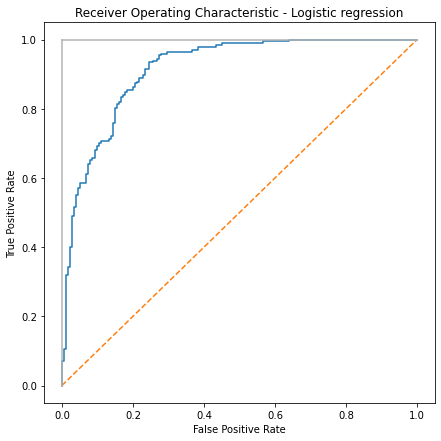

In [154]:
roc_curve_plot()

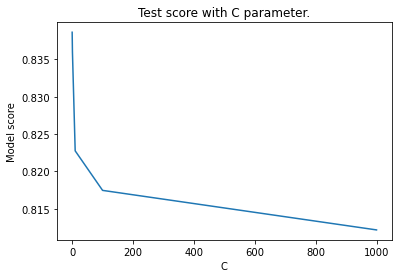

In [155]:
plot_parameters_scores(log_reg, 'C', list(log_reg_params.values())[0])

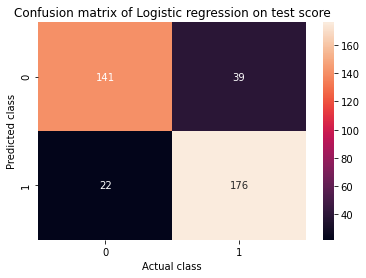

In [162]:
log_tuned = LogisticRegression(C=0.1, max_iter = 2500).fit(X_train, y_train)
log_predictions = log_tuned.predict(X_test)

log_cm = confusion_matrix(y_test, log_predictions)
plot_confusion_matrix(log_cm, 'Logistic regression')

In [164]:
score = accuracy_score(y_test, log_predictions)*100
print('Logistic Regression score: {:.2f}%'.format(score))

Logistic Regression score: 83.86%


# Support Vector Machines Classifier

A support vector machine (SVM) is machine learning algorithm that analyzes data for classification and regression analysis. Support Vector Classifier is a supervised learning method that looks at data and sorts it into one of two categories. An SVC outputs a map of the sorted data with the margins between the two as far apart as possible.

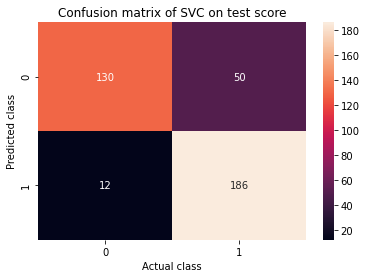

In [175]:
"""
With this dataset, the best SVC paramareters are: rbf kernel, C = 1, which are the default values. 
Only gamma needed to be changed, so there's no need for model tuning.
"""
svc = SVC(gamma = 0.01).fit(X_train, y_train)
svc_predictions = svc.predict(X_test)

svc_cm = confusion_matrix(y_test, svc_predictions)
plot_confusion_matrix(svc_cm, 'SVC')

In [176]:
score = accuracy_score(y_test, svc_predictions)*100
print('SVC score: {:.2f}%'.format(score))

SVC score: 83.60%
